## Keras RNN으로 여행자 수 예측 ##

### 1. 패키지 수입 및 파라미터 설정

In [1]:
# 수입
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.layers import Dense, LSTM, InputLayer
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
# 파라미터
MY_PAST = 12 # 12 : 1년치 의미. 24 등 과하게 하면 과적합 가능성
MY_SPLIT = 0.8
MY_HIDDEN = 300
MY_SHAPE = (MY_PAST, 1)
MY_EPOCH = 300

### 2. 데이터 처리

In [3]:
# 데이터 읽기
raw = pd.read_csv('/content/drive/MyDrive/keras files/airline.csv', 
                  header = None, 
                  usecols = [1])

# 샘플 출력
print(raw.head(15))
print(raw.describe())

      1
0   112
1   118
2   132
3   129
4   121
5   135
6   148
7   148
8   136
9   119
10  104
11  118
12  115
13  126
14  141
                1
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


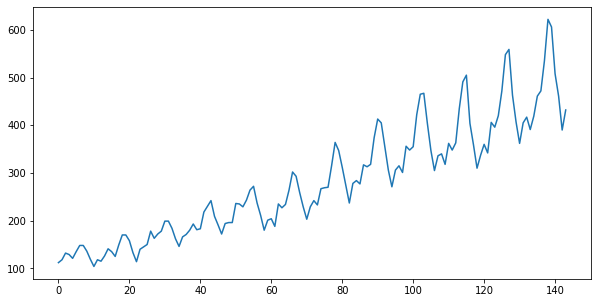

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(raw)

<class 'numpy.ndarray'>
[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556
 0.08494208 0.08494208 0.06177606 0.02895753 0.         0.02702703
 0.02123552 0.04247104 0.07142857 0.05984556 0.04054054 0.08687259
 0.12741313 0.12741313 0.1042471  0.05598456 0.01930502 0.06949807
 0.07915058 0.08880309 0.14285714 0.11389961 0.13127413 0.14285714
 0.18339768 0.18339768 0.15444015 0.11196911 0.08108108 0.11969112
 0.12934363 0.14671815 0.17181467 0.14864865 0.15250965 0.22007722
 0.24324324 0.26640927 0.2027027  0.16795367 0.13127413 0.17374517
 0.17760618 0.17760618 0.25482625 0.25289575 0.24131274 0.26833977
 0.30888031 0.32432432 0.25675676 0.20656371 0.14671815 0.18725869
 0.19305019 0.16216216 0.25289575 0.23745174 0.25096525 0.30888031
 0.38223938 0.36486486 0.2992278  0.24131274 0.19111969 0.24131274
 0.26640927 0.24903475 0.31467181 0.31853282 0.32046332 0.40733591
 0.5019305  0.46911197 0.4015444  0.32818533 0.25675676 0.33590734
 0.34749035 0.33397683 0.41119691 0.40

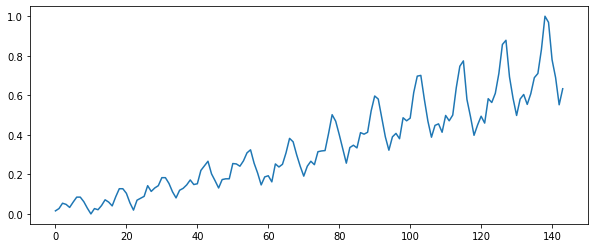

In [5]:
# 데이터 정규화
scaler = MinMaxScaler()
# scaler = StandardScaler()
s_data = scaler.fit_transform(raw)

print(type(s_data))
print(s_data.flatten())
plt.figure(figsize=(10, 4))
plt.plot(s_data)

In [6]:
# 데이터 분할
data = []
for i in range(len(s_data) - MY_PAST):
    data.append(s_data[i: i + MY_PAST + 1])

print('한 묶음의 크기: ', len(data[0]))
print('총 묶음의 수: ', len(data))
print('첫 번째 묶음 내용: \n', data[0])
print('두 번째 묶음 내용: \n', data[1])

한 묶음의 크기:  13
총 묶음의 수:  132
첫 번째 묶음 내용: 
 [[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]]
두 번째 묶음 내용: 
 [[0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]]


In [7]:
# 데이터를 numpy로 전환
print('현재 데이터 타입: ', type(data))
data = np.array(data)
print(type(data))

print('='*30)

# 묶음들을 임의로 섞음
# np.random.shuffle(data)
print(data.shape)
# print(data)

print('='*30)

# 데이터를 입력과 출력으로 분할
X_data = data[:, 0:MY_PAST] # [몇행, 몇열] 로 분할할지 결정. :는 다 취한다는 뜻. ~까지
Y_data = data[:, -1] # -1 : 마지막

print('입력 데이터 모양: ', X_data.shape)
print('출력 데이터 모양: ', Y_data.shape)

현재 데이터 타입:  <class 'list'>
<class 'numpy.ndarray'>
(132, 13, 1)
입력 데이터 모양:  (132, 12, 1)
출력 데이터 모양:  (132, 1)


In [8]:
# 데이터 4분할
X_train, X_test, Y_train, Y_test = train_test_split(X_data, 
                                                    Y_data, 
                                                    train_size=MY_SPLIT,
                                                    shuffle=False)

# 최종 데이터 모양 출력
print('\n학습용 입력 데이터 모양:', X_train.shape)
print('학습용 출력 데이터 모양:', Y_train.shape)
print('평가용 입력 데이터 모양:', X_test.shape)
print('평가용 출력 데이터 모양', Y_test.shape)


학습용 입력 데이터 모양: (105, 12, 1)
학습용 출력 데이터 모양: (105, 1)
평가용 입력 데이터 모양: (27, 12, 1)
평가용 출력 데이터 모양 (27, 1)


### 3. 인공 신경망 구현

In [9]:
# RNN 구현
model = Sequential()

model.add(InputLayer(input_shape=MY_SHAPE))

model.add(LSTM(units=MY_HIDDEN))

model.add(Dense(units=1, 
                activation='sigmoid'))

print('RNN 요약')
model.summary()

RNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 300)               362400    
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


### 4. 인공 신경망 학습

In [10]:
# RNN 학습 설정
model.compile(optimizer='adam', # rmsprop, adam, sgd
              loss='mse' # , metrics=['acc'] # 정확도 보는 것이 아니므로 없어도 된다.
              ) 

print('학습 시작')
begin=time()

model.fit(x=X_train, 
          y=Y_train, 
          epochs=MY_EPOCH,
          verbose=0)

end = time()
print('학습 시간: {:.2f}'.format(end - begin))

학습 시작
학습 시간: 7.15


### 5. 인공 신경망 평가

In [11]:
# RNN 평가
score = model.evaluate(x=X_test,
                       y=Y_test,
                       verbose=0)

print('최종 손실 값: ', score)
# print('최종 손실 값: ', score[0])
# print('최종 정확도: ', score[1]) # 큰 의미가 없다.



최종 손실 값:  0.008769448846578598


### 6. 인공 신경망 예측

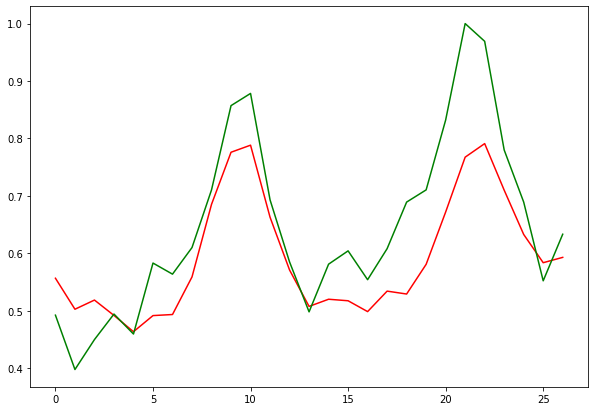

In [12]:
# RNN으로 예측
pred = model.predict(x=X_test)

# 예측 결과 및 정답 그래프 그리기
plt.figure(figsize=(10, 7))
plt.plot(pred, 'r')
plt.plot(Y_test, 'g')

In [13]:
print(pred.shape)
print('역전환 전: \n', pred)

print('='*30)

# 데이터 역전환
pred = scaler.inverse_transform(pred)

print(pred.shape)
print('역전환 후: \n', pred)

# sqeeze 결과
tmp = np.squeeze(pred).astype(int)
print(tmp.shape)
print('squeeze 후: ', tmp)

(27, 1)
역전환 전: 
 [[0.5565987 ]
 [0.5026271 ]
 [0.5185844 ]
 [0.49184677]
 [0.46349567]
 [0.49156132]
 [0.4934246 ]
 [0.5589137 ]
 [0.6852598 ]
 [0.7759654 ]
 [0.7882735 ]
 [0.6628103 ]
 [0.5709198 ]
 [0.50753796]
 [0.520023  ]
 [0.51736736]
 [0.49848694]
 [0.5341476 ]
 [0.52910584]
 [0.5808273 ]
 [0.67187417]
 [0.7674103 ]
 [0.7910172 ]
 [0.7099641 ]
 [0.632839  ]
 [0.58365   ]
 [0.59291905]]
(27, 1)
역전환 후: 
 [[392.31815]
 [364.36084]
 [372.6267 ]
 [358.7766 ]
 [344.09076]
 [358.62875]
 [359.59396]
 [393.5173 ]
 [458.9646 ]
 [505.95007]
 [512.3257 ]
 [447.33575]
 [399.73648]
 [366.90466]
 [373.37192]
 [371.9963 ]
 [362.21625]
 [380.68848]
 [378.07684]
 [404.86856]
 [452.03082]
 [501.51852]
 [513.7469 ]
 [471.7614 ]
 [431.81064]
 [406.33072]
 [411.13208]]
(27,)
squeeze 후:  [392 364 372 358 344 358 359 393 458 505 512 447 399 366 373 371 362 380
 378 404 452 501 513 471 431 406 411]


In [14]:
# 정답 출력
print('역전환 전 정답: ', Y_test)
tmp = scaler.inverse_transform(Y_test)
print('역전환 후 정답: ', tmp)

역전환 전 정답:  [[0.49227799]
 [0.3976834 ]
 [0.44980695]
 [0.49420849]
 [0.45945946]
 [0.58301158]
 [0.56370656]
 [0.61003861]
 [0.71042471]
 [0.85714286]
 [0.87837838]
 [0.69305019]
 [0.58494208]
 [0.4980695 ]
 [0.58108108]
 [0.6042471 ]
 [0.55405405]
 [0.60810811]
 [0.68918919]
 [0.71042471]
 [0.83204633]
 [1.        ]
 [0.96911197]
 [0.77992278]
 [0.68918919]
 [0.55212355]
 [0.63320463]]
역전환 후 정답:  [[359.]
 [310.]
 [337.]
 [360.]
 [342.]
 [406.]
 [396.]
 [420.]
 [472.]
 [548.]
 [559.]
 [463.]
 [407.]
 [362.]
 [405.]
 [417.]
 [391.]
 [419.]
 [461.]
 [472.]
 [535.]
 [622.]
 [606.]
 [508.]
 [461.]
 [390.]
 [432.]]
